In [21]:
# https://gist.github.com/blumonkey/007955ec2f67119e0909

import nltk
nltk.download('treebank')

# Train data - pretagged
train_data = treebank.tagged_sents()[:3000]

print(train_data[0])

# Import HMM module
from nltk.tag import hmm

# Setup a trainer with default(None) values
# And train with the data
trainer = hmm.HiddenMarkovModelTrainer()
tagger = trainer.train_supervised(train_data)

print(tagger)
# Prints the basic data about the tagger

print(tagger.tag("Today is a good day .".split()))

print(tagger.tag("Joe met Joanne in Delhi .".split()))

print(tagger.tag("Chicago is the birthplace of Ginny".split()))

"""
Output in order (Notice some tags are wrong :/):
[('Today', u'NN'), ('is', u'VBZ'), ('a', u'DT'), ('good', u'JJ'), ('day', u'NN'), ('.', u'.')]
[('Joe', u'NNP'), ('met', u'VBD'), ('Joanne', u'NNP'), ('in', u'IN'), ('Delhi', u'NNP'), ('.', u'NNP')]
[('Chicago', u'NNP'), ('is', u'VBZ'), ('the', u'DT'), ('birthplace', u'NNP'), ('of', u'NNP'), ('Ginny', u'NNP')]
"""

[nltk_data] Downloading package treebank to /Users/apple/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]
<HiddenMarkovModelTagger 46 states and 10779 output symbols>
[('Today', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('good', 'JJ'), ('day', 'NN'), ('.', '.')]
[('Joe', 'NNP'), ('met', 'VBD'), ('Joanne', 'NNP'), ('in', 'IN'), ('Delhi', 'NNP'), ('.', 'NNP')]
[('Chicago', 'NNP'), ('is', 'VBZ'), ('the', 'DT'), ('birthplace', 'NNP'), ('of', 'NNP'), ('Ginny', 'NNP')]


"\nOutput in order (Notice some tags are wrong :/):\n[('Today', u'NN'), ('is', u'VBZ'), ('a', u'DT'), ('good', u'JJ'), ('day', u'NN'), ('.', u'.')]\n[('Joe', u'NNP'), ('met', u'VBD'), ('Joanne', u'NNP'), ('in', u'IN'), ('Delhi', u'NNP'), ('.', u'NNP')]\n[('Chicago', u'NNP'), ('is', u'VBZ'), ('the', u'DT'), ('birthplace', u'NNP'), ('of', u'NNP'), ('Ginny', u'NNP')]\n"

In [2]:
import numpy as np
from hmmlearn import hmm

states = ["box 1", "box 2", "box3"]
n_states = len(states)

observations = ["red", "white"]
n_observations = len(observations)

start_probability = np.array([0.2, 0.4, 0.4])

transition_probability = np.array([
  [0.5, 0.2, 0.3],
  [0.3, 0.5, 0.2],
  [0.2, 0.3, 0.5]
])

emission_probability = np.array([
  [0.5, 0.5],
  [0.4, 0.6],
  [0.7, 0.3]
])

model = hmm.MultinomialHMM(n_components=n_states)
model.startprob_=start_probability
model.transmat_=transition_probability
model.emissionprob_=emission_probability

In [3]:
seen = np.array([[0,1,0]]).T
logprob, box = model.decode(seen, algorithm="viterbi")
print("The ball picked:", ", ".join(map(lambda x: observations[x], seen)))
print("The hidden box", ", ".join(map(lambda x: states[x], box)))

TypeError: only integer scalar arrays can be converted to a scalar index

In [13]:
box2 = model.predict(seen)
print("The ball picked:", ", ".join(map(lambda x: observations[x], seen)))
print("The hidden box", ", ".join(map(lambda x: states[x], box2)))

TypeError: only integer scalar arrays can be converted to a scalar index

In [15]:
print(model.score(seen))

-2.038545309915233


In [17]:
# Q2
states = ["box 1", "box 2", "box3"]
n_states = len(states)

observations = ["red", "white"]
n_observations = len(observations)
model2 = hmm.MultinomialHMM(n_components=n_states, n_iter=20, tol=0.01)
X2 = np.array([[0,1,0,1],[0,0,0,1],[1,0,1,1]])
model2.fit(X2)
print(model2.startprob_)
print(model2.transmat_)
print(model2.emissionprob_)
print(model2.score(X2))
model2.fit(X2)
print(model2.startprob_)
print(model2.transmat_)
print(model2.emissionprob_)
print(model2.score(X2))
model2.fit(X2)
print(model2.startprob_)
print(model2.transmat_)
print(model2.emissionprob_)
print(model2.score(X2))

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


[1.00000000e+00 2.08270040e-10 7.71618231e-21]
[[1.37511536e-06 2.42221221e-01 7.57777404e-01]
 [7.40126951e-01 1.43323275e-01 1.16549774e-01]
 [5.59717013e-01 1.24137543e-01 3.16145444e-01]]
[[9.99803022e-01 1.96977816e-04]
 [3.41801157e-01 6.58198843e-01]
 [1.03876478e-01 8.96123522e-01]]
-6.507285322642114
[5.65066964e-17 1.23777096e-28 1.00000000e+00]
[[2.19059141e-02 3.64277180e-02 9.41666368e-01]
 [1.03611475e-01 3.93939473e-01 5.02449052e-01]
 [3.67478104e-01 6.32521895e-01 1.89348643e-10]]
[[4.32321291e-01 5.67678709e-01]
 [1.11448107e-02 9.88855189e-01]
 [9.99993438e-01 6.56179504e-06]]
-6.24293917716401
[1.00000000e+00 2.85613592e-11 2.43894081e-15]
[[4.02365489e-07 3.07721419e-01 6.92278179e-01]
 [6.97384276e-01 1.38543551e-01 1.64072174e-01]
 [5.74461886e-01 1.63965857e-01 2.61572258e-01]]
[[9.99937424e-01 6.25763741e-05]
 [2.19739269e-01 7.80260731e-01]
 [1.37730899e-01 8.62269101e-01]]
-6.529897280096326


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression,LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [23]:
Q_ID = 1 #1,9,12,13,14,15,16,17,18,20,22,24,25,27,43,46

df_csv = pd.read_csv('/Users/apple/Desktop/deep_eye/dataset/input_data_ver2.csv',usecols=['participant_ID','Q_ID','text','fixation1'])
df_csv = df_csv[(df_csv['Q_ID'] == Q_ID)]
df_csv = df_csv.drop(['Q_ID'],axis=1)
df_csv

,participant_ID,text,fixation1
0,1,兩,0
1,1,個,0
2,1,量筒,1
3,1,各,1
4,1,裝,0
...,...,...,...
72060,60,100,1
72061,60,cc,0
72062,60,接近,1
72063,60,100,1


In [24]:
total_Q_df = pd.DataFrame()
for p in range(61):
    df = df_csv[df_csv['participant_ID'] == p].fixation1.reset_index(drop = True)
    total_Q_df = pd.concat([total_Q_df, df], axis = 1)
total_Q_df = total_Q_df.iloc[:,1:]
total_Q_df

,fixation1,fixation1,fixation1,fixation1,fixation1,fixation1,fixation1,fixation1,fixation1,fixation1,...,fixation1,fixation1,fixation1,fixation1,fixation1,fixation1,fixation1,fixation1,fixation1,fixation1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,1,1,1,0,...,0,1,0,1,1,1,0,1,1,1
3,1,2,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,1
4,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
5,2,0,1,0,0,0,2,0,1,1,...,0,0,0,1,1,1,0,1,1,1
6,0,0,0,1,1,0,1,1,1,0,...,0,1,0,1,1,0,1,0,1,1
7,0,1,1,1,0,0,1,2,1,1,...,0,0,0,1,1,0,1,0,1,1
8,0,4,1,1,0,0,1,0,2,1,...,0,0,0,0,1,1,0,1,0,0
9,2,2,0,1,0,6,3,0,2,0,...,0,0,1,1,0,1,0,1,0,1


In [26]:
total_Q_df

,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,...,P_51,P_52,P_53,P_54,P_55,P_56,P_57,P_58,P_59,P_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,1,1,1,0,...,0,1,0,1,1,1,0,1,1,1
3,1,2,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,1
4,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
5,2,0,1,0,0,0,2,0,1,1,...,0,0,0,1,1,1,0,1,1,1
6,0,0,0,1,1,0,1,1,1,0,...,0,1,0,1,1,0,1,0,1,1
7,0,1,1,1,0,0,1,2,1,1,...,0,0,0,1,1,0,1,0,1,1
8,0,4,1,1,0,0,1,0,2,1,...,0,0,0,0,1,1,0,1,0,0
9,2,2,0,1,0,6,3,0,2,0,...,0,0,1,1,0,1,0,1,0,1


In [25]:
A_answer = pd.read_csv("/Users/apple/Desktop/deep_eye/dataset/answer/A_P1_answer.csv")
C_answer = pd.read_csv("/Users/apple/Desktop/deep_eye/dataset/answer/C_P1_answer.csv")

total_Q_df.loc['answer'] = A_answer['1'].append(C_answer['1']).values # add answer row
total_Q_df.columns = ["P_"+str(i) for i in list(range(1,61))]
df = total_Q_df.T
df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,answer
P_1,0,0,1,1,0,2,0,0,0,2,...,7,5,3,1,2,0,0,1,0,0
P_2,0,0,0,2,1,0,0,1,4,2,...,2,6,0,2,7,2,0,4,1,1
P_3,0,0,0,0,0,1,0,1,1,0,...,3,1,0,8,1,0,1,0,0,1
P_4,0,0,0,0,0,0,1,1,1,1,...,1,2,0,7,2,0,0,0,0,1
P_5,0,0,0,1,0,0,1,0,0,0,...,4,2,0,4,1,0,2,1,0,0
P_6,0,0,0,0,0,0,0,0,0,6,...,2,0,0,0,0,0,0,0,0,0
P_7,0,0,1,0,0,2,1,1,1,3,...,2,0,0,6,1,0,1,0,0,1
P_8,0,0,1,1,1,0,1,2,0,0,...,3,1,0,3,2,0,2,0,0,1
P_9,0,0,1,0,1,1,1,1,2,2,...,2,1,0,3,0,0,3,0,0,0
P_10,0,0,0,0,0,1,0,1,1,0,...,1,0,0,1,0,0,1,0,0,1


In [6]:
x_df = df.iloc[:,:-1]
y_df = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state=816) # y_df.astype('int')

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(45, 26)
(15, 26)
(45,)
(15,)


---

In [8]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import LinearRegression,LogisticRegression

# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score

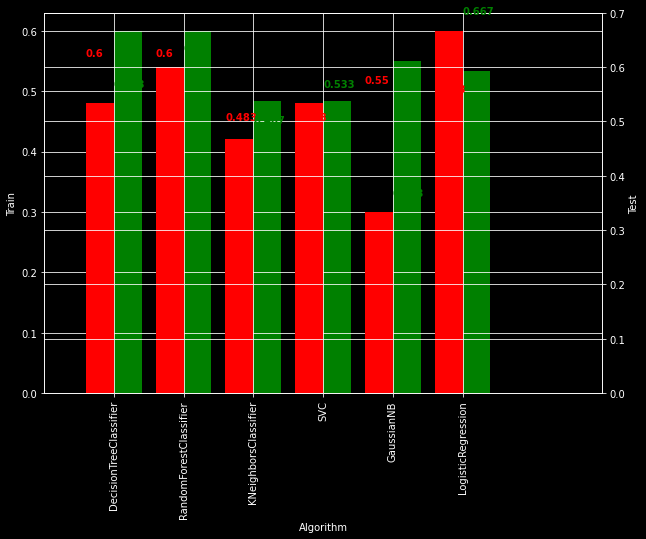

,Algorithm
Score,
0.666667,LogisticRegression
0.600000,RandomForestClassifier
0.533333,DecisionTreeClassifier
0.533333,SVC
0.466667,KNeighborsClassifier
0.333333,GaussianNB


In [9]:
# warnings.filterwarnings('ignore')
# Baseline - comparing model accuracy using all features across classifiers 
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    GaussianNB(),
    LogisticRegression()
    ]


# Train Accuracy
algo_train = []
scores_train = []
for clf in classifiers:
    algo_train.append(clf.__class__.__name__)
    scores_train.append(cross_val_score(clf, x_df, y_df.astype('int'), cv=5).mean())
# warnings.filterwarnings('ignore')
score_df_Train = pd.DataFrame({'Algorithm': algo_train, 'Score': scores_train}).set_index('Algorithm')


# Test Accuracy
algo_test = []
scores_test = []

for clf in classifiers:
    clf = clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    algo_test.append(clf.__class__.__name__)
    scores_test.append(accuracy_score(y_test, y_pred))
# warnings.filterwarnings('ignore')
score_df_Test  = pd.DataFrame({'Algorithm': algo_test, 'Score': scores_test}).set_index('Algorithm')

# Bar plot between Train and Test Accuracy
fig = plt.figure(figsize=(10,7)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .4

score_df_Train.Score.plot(kind='bar',color='green',ax=ax,width=width, position=0)
score_df_Test.Score.plot(kind='bar',color='red', ax=ax2,width = width,position=1)
ax.grid(None, axis='both')
ax2.grid(None)
ax.set_ylabel('Train')
ax2.set_ylabel('Test')
ax.set_xlim(-1,7)

scores_train_round = np.round(scores_train,3)
scores_test_round = np.round(scores_test,3)
for index,data in enumerate(scores_train_round):
    plt.text(x=index-.4 , y =data+.02 , s=f"{data}" , fontdict=dict(fontsize=10), color='red', fontweight='bold')
for index,data in enumerate(scores_test_round):
    plt.text(x=index , y =data+.03 , s=f"{data}" , fontdict=dict(fontsize=10), color='green', fontweight='bold')

plt.show()

# Table
score_df_Test_table  = pd.DataFrame({'Algorithm': algo_test, 'Score': scores_test})
result_df = score_df_Test_table.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df


---

In [58]:
#Q_ID = 1 #1,9,12,13,14,15,16,17,18,20,22,24,25,27,43,46

df_raw = pd.read_csv('/Users/apple/Desktop/deep_eye/dataset/input_data_ver2.csv',usecols=['participant_ID','Q_ID','text','fixation1'])
A_answer = pd.read_csv("/Users/apple/Desktop/deep_eye/dataset/answer/A_P1_answer.csv")
C_answer = pd.read_csv("/Users/apple/Desktop/deep_eye/dataset/answer/C_P1_answer.csv")

final_list =  []
for q in range(1,48):
    df_csv = df_raw[(df_raw['Q_ID'] == q)]
    df_csv = df_csv.drop(['Q_ID'],axis=1)

    total_Q_df = pd.DataFrame()
    for p in range(61):
        df = df_csv[df_csv['participant_ID'] == p].fixation1.reset_index(drop = True)
        total_Q_df = pd.concat([total_Q_df, df], axis = 1)
    total_Q_df = total_Q_df.iloc[:,1:]



    total_Q_df.loc['answer'] = A_answer['1'].append(C_answer['1']).values # add answer row
    total_Q_df.columns = ["P_"+str(i) for i in list(range(1,61))]
    df = total_Q_df.T



    x_df = df.iloc[:,:-1]
    y_df = df.iloc[:,-1]
    x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state=816) # y_df.astype('int')

    print(x_train.shape)
    print(x_test.shape)
    print(y_train.shape)
    print(y_test.shape)



    # warnings.filterwarnings('ignore')
    # Baseline - comparing model accuracy using all features across classifiers 
    classifiers = [
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        KNeighborsClassifier(),
        SVC(kernel="linear"),
        GaussianNB(),
        LogisticRegression()
        ]


    # Train Accuracy
    algo_train = []
    scores_train = []
    for clf in classifiers:
        algo_train.append(clf.__class__.__name__)
        scores_train.append(cross_val_score(clf, x_df, y_df.astype('int'), cv=5).mean())
    #warnings.filterwarnings('ignore')
    score_df_Train = pd.DataFrame({'Algorithm': algo_train, 'Score': scores_train}).set_index('Algorithm')


    # Test Accuracy
    algo_test = []
    scores_test = []

    for clf in classifiers:
        clf = clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        algo_test.append(clf.__class__.__name__)
        scores_test.append(accuracy_score(y_test, y_pred))
    # warnings.filterwarnings('ignore')

    # Table
    score_df_Test_table  = pd.DataFrame({'Algorithm': algo_test, 'Score': scores_test})
    result_df = score_df_Test_table.sort_values(by='Score', ascending=False)
    final_list.append(result_df.values[0])
final_list

(45, 26)
(15, 26)
(45,)
(15,)
(45, 28)
(15, 28)
(45,)
(15,)
(45, 20)
(15, 20)
(45,)
(15,)
(45, 19)
(15, 19)
(45,)
(15,)
(45, 30)
(15, 30)
(45,)
(15,)
(45, 35)
(15, 35)
(45,)
(15,)
(45, 14)
(15, 14)
(45,)
(15,)
(45, 37)
(15, 37)
(45,)
(15,)
(45, 16)
(15, 16)
(45,)
(15,)
(45, 34)
(15, 34)
(45,)
(15,)
(45, 27)
(15, 27)
(45,)
(15,)
(45, 26)
(15, 26)
(45,)
(15,)
(45, 27)
(15, 27)
(45,)
(15,)
(45, 20)
(15, 20)
(45,)
(15,)
(45, 38)
(15, 38)
(45,)
(15,)
(45, 16)
(15, 16)
(45,)
(15,)
(45, 26)
(15, 26)
(45,)
(15,)
(45, 36)
(15, 36)
(45,)
(15,)
(45, 20)
(15, 20)
(45,)
(15,)
(45, 22)
(15, 22)
(45,)
(15,)
(45, 19)
(15, 19)
(45,)
(15,)
(45, 29)
(15, 29)
(45,)
(15,)
(45, 20)
(15, 20)
(45,)
(15,)
(45, 39)
(15, 39)
(45,)
(15,)
(45, 23)
(15, 23)
(45,)
(15,)
(45, 32)
(15, 32)
(45,)
(15,)
(45, 20)
(15, 20)
(45,)
(15,)
(45, 33)
(15, 33)
(45,)
(15,)
(45, 19)
(15, 19)
(45,)
(15,)
(45, 28)
(15, 28)
(45,)
(15,)
(45, 26)
(15, 26)
(45,)
(15,)
(45, 22)
(15, 22)
(45,)
(15,)
(45, 29)
(15, 29)
(45,)
(15,)
(45, 21)
(

[array(['RandomForestClassifier', 0.6666666666666666], dtype=object),
 array(['DecisionTreeClassifier', 0.5333333333333333], dtype=object),
 array(['DecisionTreeClassifier', 0.6], dtype=object),
 array(['SVC', 0.6], dtype=object),
 array(['DecisionTreeClassifier', 0.5333333333333333], dtype=object),
 array(['SVC', 0.6666666666666666], dtype=object),
 array(['GaussianNB', 0.3333333333333333], dtype=object),
 array(['KNeighborsClassifier', 0.4666666666666667], dtype=object),
 array(['GaussianNB', 0.8666666666666667], dtype=object),
 array(['DecisionTreeClassifier', 0.6], dtype=object),
 array(['RandomForestClassifier', 0.5333333333333333], dtype=object),
 array(['SVC', 0.8], dtype=object),
 array(['DecisionTreeClassifier', 0.4666666666666667], dtype=object),
 array(['KNeighborsClassifier', 0.5333333333333333], dtype=object),
 array(['SVC', 0.7333333333333333], dtype=object),
 array(['RandomForestClassifier', 0.4666666666666667], dtype=object),
 array(['DecisionTreeClassifier', 0.53333333

In [61]:
ttt = pd.DataFrame(final_list)
max(ttt[1])

0.8666666666666667

<AxesSubplot:>

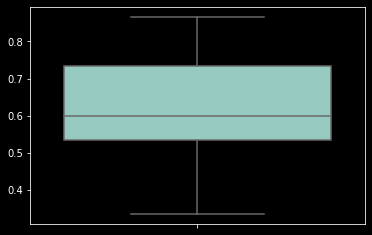

In [65]:
import seaborn as sns
sns.boxplot(y = ttt[1].values)

In [64]:
ttt[1].values

array([0.66666667, 0.53333333, 0.6       , 0.6       , 0.53333333,
       0.66666667, 0.33333333, 0.46666667, 0.86666667, 0.6       ,
       0.53333333, 0.8       , 0.46666667, 0.53333333, 0.73333333,
       0.46666667, 0.53333333, 0.73333333, 0.66666667, 0.46666667,
       0.66666667, 0.6       , 0.6       , 0.66666667, 0.66666667,
       0.53333333, 0.53333333, 0.8       , 0.66666667, 0.53333333,
       0.8       , 0.86666667, 0.46666667, 0.8       , 0.73333333,
       0.46666667, 0.73333333, 0.8       , 0.6       , 0.6       ,
       0.6       , 0.73333333, 0.73333333, 0.8       , 0.6       ,
       0.6       , 0.6       ])

In [62]:
ttt

,0,1
0,RandomForestClassifier,0.666667
1,DecisionTreeClassifier,0.533333
2,DecisionTreeClassifier,0.600000
3,SVC,0.600000
4,DecisionTreeClassifier,0.533333
5,SVC,0.666667
6,GaussianNB,0.333333
7,KNeighborsClassifier,0.466667
8,GaussianNB,0.866667
9,DecisionTreeClassifier,0.600000


In [66]:
from xgboost import XGBClassifier


xgboostModel = XGBClassifier(n_estimators=1000, learning_rate= 0.3)

xgboostModel.fit(x_train, y_train)

predicted = xgboostModel.predict(x_test)

# # 預測成功的比例
# print('訓練集: ',xgboostModel.score(x_train,y_train))
print('測試集: ',xgboostModel.score(x_test,y_test))

/Users/apple/Documents/ml_env/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:37:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
測試集:  0.6666666666666666


In [11]:
predicted

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [95]:
y_test

P_24    0
P_58    0
P_33    1
P_32    0
P_6     0
P_54    1
P_4     1
P_8     1
P_11    0
P_26    0
P_55    0
P_34    0
P_50    0
P_18    0
P_3     1
Name: answer, dtype: int64

In [70]:
clf = KNeighborsClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [72]:
y_test

P_24    0
P_58    0
P_33    1
P_32    0
P_6     0
P_54    1
P_4     1
P_8     1
P_11    0
P_26    0
P_55    0
P_34    0
P_50    0
P_18    0
P_3     1
Name: answer, dtype: int64

In [14]:
# df1 = pd.read_csv('/Users/apple/Desktop/202108eyeml/A/P5/P5_fix_level.csv')
# df1 = df1.drop(df1.columns[[0]], axis=1)
# df2 = pd.read_csv('/Users/apple/Desktop/202108eyeml/A/P5/P5_reg_level.csv')
# df2 = df2.drop(df2.columns[[0]], axis=1)
# df3 = pd.read_csv('/Users/apple/Desktop/202108eyeml/A/P5/P5_sac_level.csv')
# df3 = df3.drop(df3.columns[[0]], axis=1)

# ans = pd.read_csv('/Users/apple/Desktop/202108eyeml/P5/P5/answercheck_A_P5.csv')
# ans = ans.drop(ans.columns[0], axis = 1)
# ans = np.array(ans).reshape(1410, 1)
# ans_df = pd.DataFrame(ans)
# ans_df.columns = ['ans']

# QCP_combine = pd.concat([df1, df2, df3, ans_df],axis = 1)
# QCP_combine.dropna(inplace= True)# drop na
# # QCP_combine.to_csv('/Users/apple/Desktop/202108eyeml/A/P5/P5_all_level.csv')
# QCP_combine

In [25]:
QCP_combine = pd.read_csv('/Users/apple/Desktop/202108eyeml/A/AP1_check/QCP_count_duration_ans/QCP_combine.csv')
seq = pd.read_csv('/Users/apple/Desktop/pre/result.csv')
seq = seq.drop(seq.columns[0], axis = 1)
QCP_combine = QCP_combine.drop(QCP_combine.columns[0], axis = 1)
QCP_combine = QCP_combine.iloc[:,[3, 4, 5, 6]]

QCP_combine = QCP_combine.drop([QCP_combine.index[964], QCP_combine.index[978]])
QCP_combine = pd.concat([QCP_combine, seq],axis = 1)
QCP_combine.dropna(inplace= True)
QCP_combine

,QAOI_duration,CAOI_duration,PAOI_duration,answer,[1],"[1, 2]","[1, 2, 1]","[1, 2, 1, 2]","[1, 2, 3]","[1, 2, 3, 1]",...,"[3, 1, 2, 3]","[3, 1, 3]","[3, 1, 3, 1]","[3, 2]","[3, 2, 1]","[3, 2, 1, 2]","[3, 2, 1, 3]","[3, 2, 3]","[3, 2, 3, 1]","[3, 2, 3, 2]"
0,2628.0,4083.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3109.0,5497.0,465.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4836.0,1882.0,2542.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1948.0,3536.0,679.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2875.0,2898.0,1432.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,2747.0,585.0,2481.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1404,1894.0,211.0,353.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1405,4026.0,0.0,326.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1406,2085.0,1164.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# nofsequence = pd.read_csv('/Users/apple/Desktop/202108eyeml/A/AP1_check/P1_sequential_numberofsequence_beforemerge_updown.csv')
# nofsequence = nofsequence.drop(nofsequence.columns[[0]], axis=1)
# QCP_combine = pd.concat([QCP_combine, nofsequence], axis=1)
# QCP_combine

In [27]:
cols_at_end = ['answer']
QCP_combine = QCP_combine[[c for c in QCP_combine if c not in cols_at_end] + [c for c in cols_at_end if c in QCP_combine]]
QCP_combine


,QAOI_duration,CAOI_duration,PAOI_duration,[1],"[1, 2]","[1, 2, 1]","[1, 2, 1, 2]","[1, 2, 3]","[1, 2, 3, 1]","[1, 2, 3, 2]",...,"[3, 1, 3]","[3, 1, 3, 1]","[3, 2]","[3, 2, 1]","[3, 2, 1, 2]","[3, 2, 1, 3]","[3, 2, 3]","[3, 2, 3, 1]","[3, 2, 3, 2]",answer
0,2628.0,4083.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3109.0,5497.0,465.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4836.0,1882.0,2542.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1948.0,3536.0,679.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2875.0,2898.0,1432.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,2747.0,585.0,2481.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1404,1894.0,211.0,353.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1405,4026.0,0.0,326.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1406,2085.0,1164.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


---

In [28]:
x_df = QCP_combine.iloc[:, :45]
y_df = QCP_combine.iloc[:, 45]

print(QCP_combine.shape)
print(x_df.shape)
print(y_df)

(1406, 46)
(1406, 45)
0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
1403    0.0
1404    1.0
1405    0.0
1406    1.0
1407    1.0
Name: answer, Length: 1406, dtype: float64


# Missing data

In [29]:
for i in range(QCP_combine.shape[1]):
	na_count = QCP_combine.isna().sum()[i]
	percent = na_count / QCP_combine.shape[0] * 100
	print('%d:Missing: %d (%.1f%%)' % (i, na_count, percent))

0:Missing: 0 (0.0%)
1:Missing: 0 (0.0%)
2:Missing: 0 (0.0%)
3:Missing: 0 (0.0%)
4:Missing: 0 (0.0%)
5:Missing: 0 (0.0%)
6:Missing: 0 (0.0%)
7:Missing: 0 (0.0%)
8:Missing: 0 (0.0%)
9:Missing: 0 (0.0%)
10:Missing: 0 (0.0%)
11:Missing: 0 (0.0%)
12:Missing: 0 (0.0%)
13:Missing: 0 (0.0%)
14:Missing: 0 (0.0%)
15:Missing: 0 (0.0%)
16:Missing: 0 (0.0%)
17:Missing: 0 (0.0%)
18:Missing: 0 (0.0%)
19:Missing: 0 (0.0%)
20:Missing: 0 (0.0%)
21:Missing: 0 (0.0%)
22:Missing: 0 (0.0%)
23:Missing: 0 (0.0%)
24:Missing: 0 (0.0%)
25:Missing: 0 (0.0%)
26:Missing: 0 (0.0%)
27:Missing: 0 (0.0%)
28:Missing: 0 (0.0%)
29:Missing: 0 (0.0%)
30:Missing: 0 (0.0%)
31:Missing: 0 (0.0%)
32:Missing: 0 (0.0%)
33:Missing: 0 (0.0%)
34:Missing: 0 (0.0%)
35:Missing: 0 (0.0%)
36:Missing: 0 (0.0%)
37:Missing: 0 (0.0%)
38:Missing: 0 (0.0%)
39:Missing: 0 (0.0%)
40:Missing: 0 (0.0%)
41:Missing: 0 (0.0%)
42:Missing: 0 (0.0%)
43:Missing: 0 (0.0%)
44:Missing: 0 (0.0%)
45:Missing: 0 (0.0%)


# Data balance

0.0    734
1.0    672
Name: answer, dtype: int64


<AxesSubplot:>

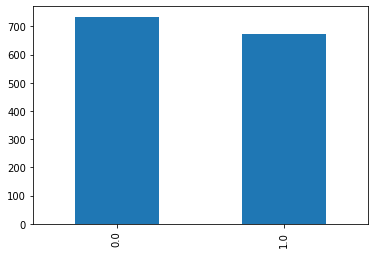

In [30]:
print(y_df.value_counts())
y_df.value_counts().plot.bar()

---

## Standardize

In [31]:
from sklearn.preprocessing import StandardScaler
x_standard_df = pd.DataFrame(StandardScaler().fit_transform(x_df))
x_standard_df.describe().loc[['mean', 'std']].style.format("{:.1f}") # check meand and std

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
mean,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---

# train test split

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_standard_df, y_df.astype('int'), random_state=816)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1054, 45)
(352, 45)
(1054,)
(352,)


---

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression,LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

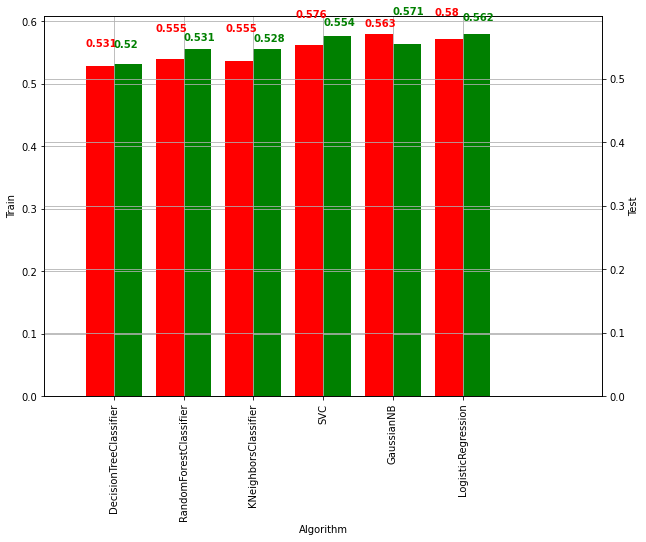

,Algorithm
Score,
0.571023,GaussianNB
0.562500,LogisticRegression
0.553977,SVC
0.531250,RandomForestClassifier
0.528409,KNeighborsClassifier
0.519886,DecisionTreeClassifier


In [35]:
# warnings.filterwarnings('ignore')
# Baseline - comparing model accuracy using all features across classifiers 
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    GaussianNB(),
    LogisticRegression()
    ]


# Train Accuracy
algo_train = []
scores_train = []
for clf in classifiers:
    algo_train.append(clf.__class__.__name__)
    scores_train.append(cross_val_score(clf, x_standard_df, y_df.astype('int'), cv=5).mean())
# warnings.filterwarnings('ignore')
score_df_Train = pd.DataFrame({'Algorithm': algo_train, 'Score': scores_train}).set_index('Algorithm')


# Test Accuracy
algo_test = []
scores_test = []

for clf in classifiers:
    clf = clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    algo_test.append(clf.__class__.__name__)
    scores_test.append(accuracy_score(y_test, y_pred))
# warnings.filterwarnings('ignore')
score_df_Test  = pd.DataFrame({'Algorithm': algo_test, 'Score': scores_test}).set_index('Algorithm')

# Bar plot between Train and Test Accuracy
fig = plt.figure(figsize=(10,7)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .4

score_df_Train.Score.plot(kind='bar',color='green',ax=ax,width=width, position=0)
score_df_Test.Score.plot(kind='bar',color='red', ax=ax2,width = width,position=1)
ax.grid(None, axis='both')
ax2.grid(None)
ax.set_ylabel('Train')
ax2.set_ylabel('Test')
ax.set_xlim(-1,7)

scores_train_round = np.round(scores_train,3)
scores_test_round = np.round(scores_test,3)
for index,data in enumerate(scores_train_round):
    plt.text(x=index-.4 , y =data+.02 , s=f"{data}" , fontdict=dict(fontsize=10), color='red', fontweight='bold')
for index,data in enumerate(scores_test_round):
    plt.text(x=index , y =data+.03 , s=f"{data}" , fontdict=dict(fontsize=10), color='green', fontweight='bold')

plt.show()

# Table
score_df_Test_table  = pd.DataFrame({'Algorithm': algo_test, 'Score': scores_test})
result_df = score_df_Test_table.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df


---

In [36]:
import optuna
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm


# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective(trial):
    iris = sklearn.datasets.load_iris()
    x, y = iris.data, iris.target

    classifier_name = trial.suggest_categorical("classifier", ["SVC", "RandomForest"])
    if classifier_name == "SVC":
        svc_c = trial.suggest_float("svc_c", 1e-10, 1e10, log=True)
        classifier_obj = sklearn.svm.SVC(C=svc_c, gamma="auto")
    else:
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        classifier_obj = sklearn.ensemble.RandomForestClassifier(
            max_depth=rf_max_depth, n_estimators=10
        )

    score = sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)
    print(study.best_trial)

[I 2021-11-22 14:32:50,256] A new study created in memory with name: no-name-475cad98-9053-46ac-8ebb-ec7e1cc9c235
[I 2021-11-22 14:32:51,884] Trial 0 finished with value: 0.9466666666666667 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 2}. Best is trial 0 with value: 0.9466666666666667.
[I 2021-11-22 14:32:52,336] Trial 1 finished with value: 0.32 and parameters: {'classifier': 'SVC', 'svc_c': 8.30259175644146e-10}. Best is trial 0 with value: 0.9466666666666667.
[I 2021-11-22 14:32:52,353] Trial 2 finished with value: 0.96 and parameters: {'classifier': 'SVC', 'svc_c': 13901995.29854988}. Best is trial 2 with value: 0.96.
[I 2021-11-22 14:32:52,408] Trial 3 finished with value: 0.9466666666666667 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 11}. Best is trial 2 with value: 0.96.
[I 2021-11-22 14:32:52,441] Trial 4 finished with value: 0.96 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 9}. Best is trial 2 with value: 0.96.
[I 2021-11-

FrozenTrial(number=53, values=[0.9866666666666667], datetime_start=datetime.datetime(2021, 11, 22, 14, 32, 53, 814393), datetime_complete=datetime.datetime(2021, 11, 22, 14, 32, 53, 826650), params={'classifier': 'SVC', 'svc_c': 3.884087686416866}, distributions={'classifier': CategoricalDistribution(choices=('SVC', 'RandomForest')), 'svc_c': LogUniformDistribution(high=10000000000.0, low=1e-10)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=53, state=TrialState.COMPLETE, value=None)


In [37]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_classifier,params_rf_max_depth,params_svc_c,state
0,0,0.946667,2021-11-22 14:32:50.258090,2021-11-22 14:32:51.883711,0 days 00:00:01.625621,RandomForest,2.0,NaN,COMPLETE
1,1,0.320000,2021-11-22 14:32:51.887322,2021-11-22 14:32:52.336563,0 days 00:00:00.449241,SVC,NaN,8.302592e-10,COMPLETE
2,2,0.960000,2021-11-22 14:32:52.337646,2021-11-22 14:32:52.352562,0 days 00:00:00.014916,SVC,NaN,1.390200e+07,COMPLETE
3,3,0.946667,2021-11-22 14:32:52.353902,2021-11-22 14:32:52.408135,0 days 00:00:00.054233,RandomForest,11.0,NaN,COMPLETE
4,4,0.960000,2021-11-22 14:32:52.409150,2021-11-22 14:32:52.441329,0 days 00:00:00.032179,RandomForest,9.0,NaN,COMPLETE
...,...,...,...,...,...,...,...,...,...
95,95,0.960000,2021-11-22 14:32:54.443352,2021-11-22 14:32:54.458347,0 days 00:00:00.014995,SVC,NaN,2.383664e-01,COMPLETE
96,96,0.960000,2021-11-22 14:32:54.459241,2021-11-22 14:32:54.471259,0 days 00:00:00.012018,SVC,NaN,7.896891e+01,COMPLETE
97,97,0.966667,2021-11-22 14:32:54.472128,2021-11-22 14:32:54.484946,0 days 00:00:00.012818,SVC,NaN,1.636694e+00,COMPLETE
98,98,0.986667,2021-11-22 14:32:54.485961,2021-11-22 14:32:54.498917,0 days 00:00:00.012956,SVC,NaN,4.757539e+00,COMPLETE


# Tree based feature selection

In [12]:
# Feature selection using Random Forest Classifier
from sklearn.feature_selection import SelectFromModel
# Bagged decision trees for feature importance- embedded method
Rtree_clf = RandomForestClassifier()
Rtree_clf = Rtree_clf.fit(x_train,y_train)
model = SelectFromModel(Rtree_clf, prefit=True)
RF_tree_featuresTrain = pd.DataFrame(x_train).loc[:, model.get_support()]
RF_tree_featuresTest = pd.DataFrame(x_test).loc[:, model.get_support()]
print(RF_tree_featuresTrain.columns)

Index([3, 5, 9, 11, 14, 16, 18, 19, 20, 21, 23], dtype='object')


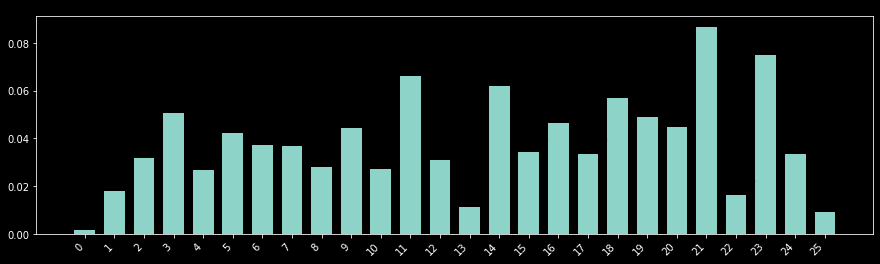

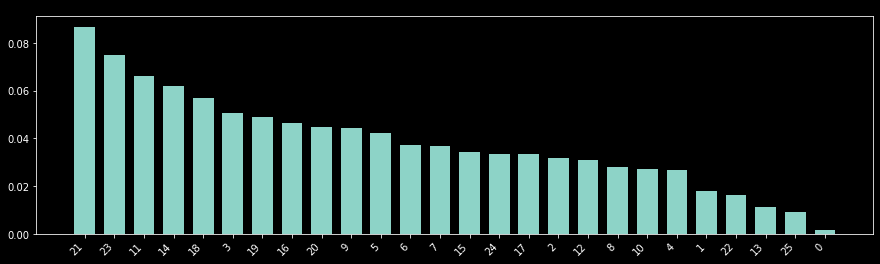

In [13]:
importance = Rtree_clf.feature_importances_
# for i,v in enumerate(importance):
#     print('Feature:', i, x_df.columns[i] , ', Score:', round(v,4))

# plot feature importance
plt.figure(figsize=(15,4))
plt.bar(np.arange(len(importance)), importance,width = 0.7)
plt.xticks(np.arange(len(importance)), x_df.columns, rotation=45,ha='right')
importance_round = np.round(importance,3)
for index,data in enumerate(importance_round):
    plt.text(x=index-.4 , y =data+.005 , s=f"{data}" , fontdict=dict(fontsize=10), color='black', fontweight='bold')
plt.show()


indices = np.argsort(importance)[::-1]
# # Feature Ranking
# for f in range(18):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

importance_sort = importance[np.argsort(importance)[::-1]]

x_column_sort = []
for i in indices:
    x_column_sort.append(x_df.columns[i])

plt.figure(figsize=(15,4))
plt.bar(np.arange(len(importance)), np.array(importance_sort),width = 0.7)
plt.xticks(np.arange(len(importance)),  x_column_sort, rotation=45,ha='right')
importance_sort_round = np.round(importance_sort,3)
for index,data in enumerate(importance_sort_round):
    plt.text(x=index-.4 , y =data+.005 , s=f"{data}" , fontdict=dict(fontsize=10), color='black', fontweight='bold')
plt.show()

# Recursive Feature Elmination¶

Optimal number of features : 3


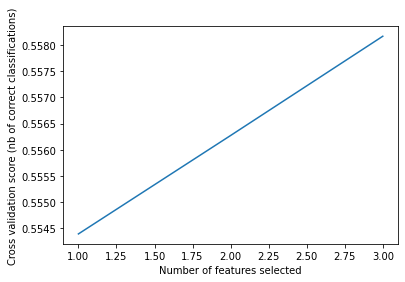

In [32]:
# Applying RFE Cross validation to find number of features
# The "accuracy" scoring is proportional to the number of correct classifications

# Before we apply RFE we need to know the optimal number of features. Hence RFECV crossvalidation technique is used to find 
# the optimal number of features based on the accuracy score in the training set. 

# Applying RFECV with svm classifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

svc=SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), # Stratified fold inorder to reduce bias
              scoring='accuracy')
rfetrain=rfecv.fit(RF_tree_featuresTrain, y_train)
print('Optimal number of features :', rfecv.n_features_)


# Plot showing the Cross Validation score
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [33]:
# Applying RFE with optimal number of features
from sklearn.feature_selection import RFE

rfe = RFE(estimator=svc, n_features_to_select=rfecv.n_features_, step=1)
rfe = rfe.fit(RF_tree_featuresTrain, y_train)

rfe_train=RF_tree_featuresTrain.loc[:, rfe.get_support()]
rfe_test=RF_tree_featuresTest.loc[:, rfe.get_support()]


# Checking the Accuracy after rfe
# Train Accuracy
print("Train Accuracy:",cross_val_score(svc,rfe_train,y_train, cv=5).mean())
# Test Accuracy
scv = svc.fit(rfe_train, y_train)
y_pred = scv.predict(rfe_test)
print("Test Accuracy:",accuracy_score(y_pred, y_test))

Train Accuracy: 0.5629035142627201
Test Accuracy: 0.603399433427762
